# PneumoCNN #1
###Usando redes neurais convolucionais para auxiliar diagnóstico da Pneumonia


In [ ]:

import numpy as np 
import matplotlib.pyplot as plt 
import os
import pandas as pd 
import seaborn as sns
from PIL import Image


import keras
from keras.models import Sequential
from keras.models import model_from_json, load_model #manipulação de arquivos de armazenagem de rede
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
mainDIR = os.listdir('../IC/chest_xray/chest_xray')
print(mainDIR)

['.DS_Store', 'test', 'train', 'val']


In [ ]:
train_folder= '../IC/chest_xray/chest_xray/train/'
val_folder = '../IC/chest_xray/chest_xray/val/'
test_folder = '../IC/chest_xray/chest_xray/test/'



In [ ]:

os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'


1342
normal picture title:  IM-0491-0001.jpeg
pneumonia picture title: person585_bacteria_2411.jpeg


Text(0.5, 1.0, 'Pneumonia')

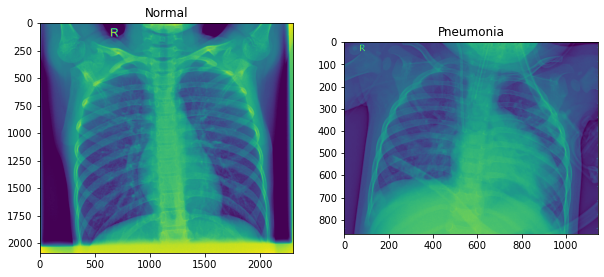

In [ ]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)


norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)


f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

In [ ]:
cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))


cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])






In [ ]:
num_of_test_samples = 600
batch_size = 32

In [ ]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('../IC/chest_xray/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('../IC/chest_xray/chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('../IC/chest_xray/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [ ]:
cnn_model = cnn.fit(training_set,
                         steps_per_epoch = training_set.samples//batch_size,
                         epochs = 1,
                         validation_data = validation_generator,
                         validation_steps = 624)

163/163 [==============================] - 276s 2s/step - loss: 0.3637 - accuracy: 0.8436 - val_loss: 0.2871 - val_accuracy: 0.9375


In [ ]:
test_accu = cnn.evaluate(test_set)


20/20 [==============================] - 20s 1s/step - loss: 0.3485 - accuracy: 0.8397


In [ ]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 83.97436141967773 %


Text(0.5, 1.0, 'Pneumonia')

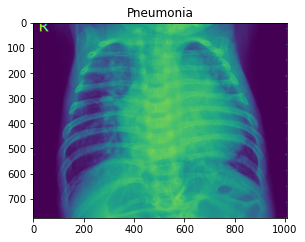

In [ ]:
imag = load_img(sic_address,target_size = (64,64))

imag = img_to_array(imag)
imag = np.expand_dims(imag, axis = 0)
result = cnn.predict(imag)
training_set.class_indices

if result[0][0] == 0:
    prediction = 'Normal'
else:
    prediction = 'Pneumonia'

f = plt.figure(figsize= (10,6))
a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title(prediction)



In [ ]:
test_accu = cnn.evaluate(validation_generator)
print('The testing accuracy is :',test_accu[1]*100, '%')

1/1 [==============================] - 0s 3ms/step - loss: 0.2871 - accuracy: 0.9375
The testing accuracy is : 93.75 %


In [ ]:
#salvando modelo arquivo único peso e arquitetura
cnn.save("modelCNN2.h5")

#carregando modelo armazenado em arquivo único
cnn2 = load_model('modelCNN2.h5')

cnn2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
test_accu = cnn2.evaluate(test_set)
print('The testing accuracy is :',test_accu[1]*100, '%')

20/20 [==============================] - 18s 896ms/step - loss: 0.3485 - accuracy: 0.8397
The testing accuracy is : 83.97436141967773 %


20/20 [==============================] - 19s 943ms/step
Classification Report: 
              precision    recall  f1-score   support

           0       0.38      0.89      0.53       234
           1       0.65      0.13      0.21       390

    accuracy                           0.41       624
   macro avg       0.52      0.51      0.37       624
weighted avg       0.55      0.41      0.33       624



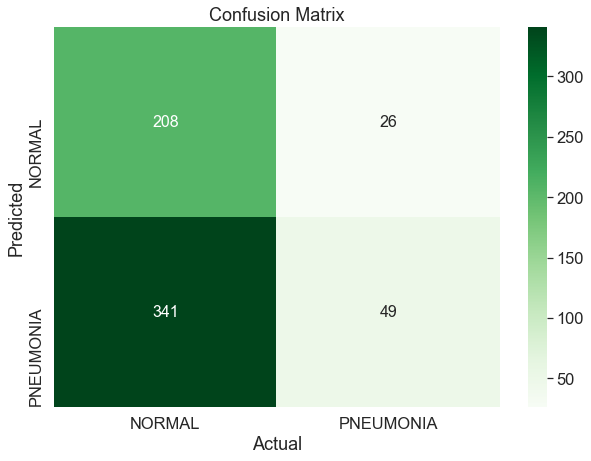

In [ ]:
#matriz de confusão
test_set.reset()
y_pred = (cnn.predict(test_set,verbose=True) > 0.5).astype("int32")

y_true = test_set.classes
data=confusion_matrix(y_true, y_pred)
#print(y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Predicted'
df_cm.columns.name = 'Actual'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.5)
ax = sns.heatmap(df_cm,cmap = 'Greens', annot=True,fmt = '.5g',annot_kws={"size": 16})# font size
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['NORMAL', 'PNEUMONIA']); ax.yaxis.set_ticklabels(['NORMAL', 'PNEUMONIA']);

print("Classification Report: ")
print(classification_report(y_true,y_pred))

